In [121]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv('/content/DOGE_GBP.csv')

In [236]:
df.shape

(2008, 5)

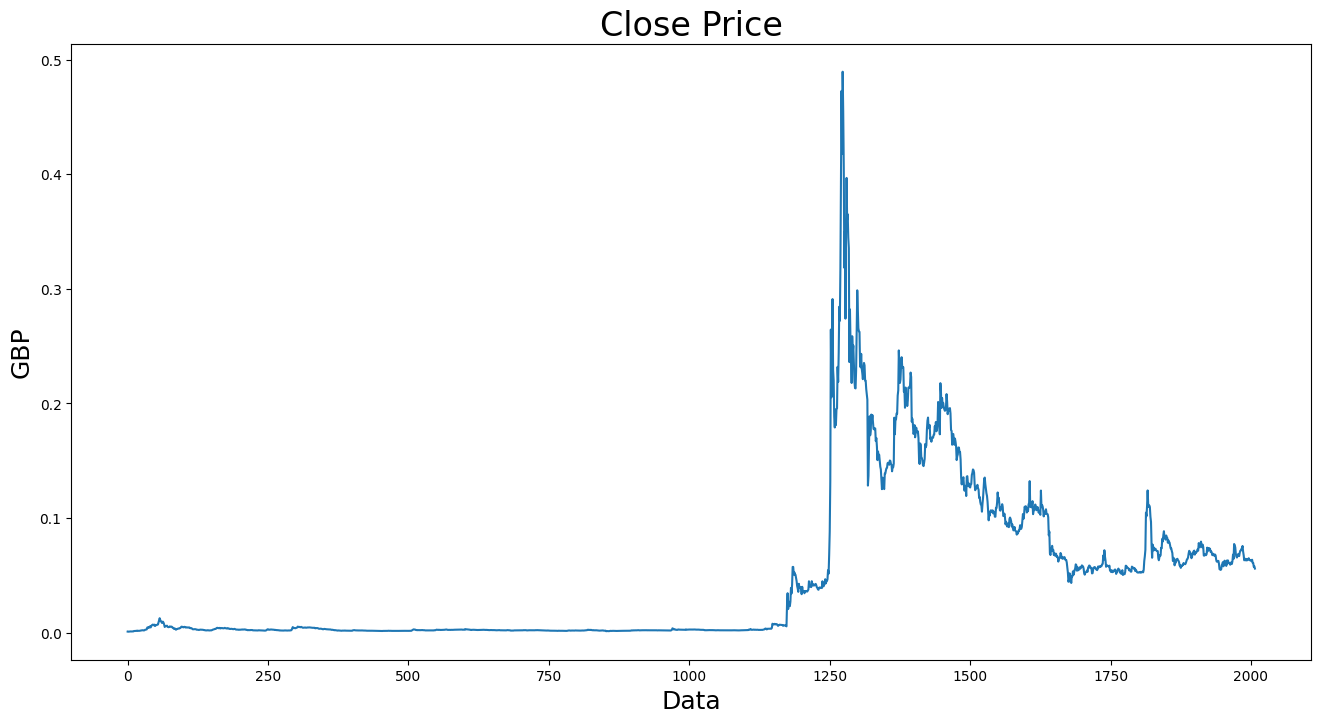

In [237]:
plt.figure(figsize=(16,8))
plt.title('Close Price', fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('GBP', fontsize=18)
plt.show()

In [238]:
data = df.filter(['Close'])
# data
#Convert the dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on. we need this number to create our train and test sets
# math.ceil will round up the number
training_data_len = math.ceil(len(dataset) * .8) # We are using %80 of the data for training
training_data_len

1607

In [239]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00024552],
       [0.        ],
       [0.00027007],
       ...,
       [0.11594609],
       [0.11692   ],
       [0.11277455]])

In [240]:
# Creat the training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])


  if i <= 60:
    print(X_train)
    print(y_train)
    print()

[array([0.00024552, 0.        , 0.00027007, 0.00022302, 0.00046036,
       0.00053606, 0.00041534, 0.00050741, 0.0005156 , 0.00053401,
       0.00052787, 0.0011826 , 0.00128899, 0.00130945, 0.00156112,
       0.0014936 , 0.00143426, 0.00199896, 0.00155498, 0.00152633,
       0.001645  , 0.001645  , 0.00175344, 0.00212377, 0.00216469,
       0.00244909, 0.00251047, 0.00263119, 0.00238157, 0.00227313,
       0.00267006, 0.00345778, 0.00366238, 0.00403271, 0.00415957,
       0.00749663, 0.00757642, 0.00821887, 0.00704241, 0.00857693,
       0.00973907, 0.00765622, 0.00950173, 0.0115232 , 0.01204494,
       0.01277946, 0.01192627, 0.01130223, 0.01260146, 0.01028331,
       0.01198151, 0.01187512, 0.01214724, 0.01249711, 0.01294314,
       0.01672829, 0.02079373, 0.02413898, 0.02106995, 0.01867815])]
[0.01822188193428924]



In [241]:
len(X_train)

1547

In [242]:
X_train, y_train = np.array(X_train), np.array(y_train)
     

In [243]:
X_train.shape
     

(1547, 60)

In [244]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # we make it like pros. it wanna say "np.reshape(X_train, (2083, 60, 1))"
X_train.shape
     

(1547, 60, 1)

In [245]:
test_data = scaled_data[training_data_len - 60 : , :]

#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])

In [246]:
X_test = np.array(X_test)

In [247]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [248]:
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) , the simple form is "input_shape(60, 1)""
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

In [249]:
model_1.compile(optimizer='adam', loss='mse')

In [250]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1547/1547 [==============================] - 50s 30ms/step - loss: 0.0019
Epoch 2/10
1547/1547 [==============================] - 45s 29ms/step - loss: 9.7219e-04
Epoch 3/10
1547/1547 [==============================] - 43s 28ms/step - loss: 0.0012
Epoch 4/10
1547/1547 [==============================] - 42s 27ms/step - loss: 5.9756e-04
Epoch 5/10
1547/1547 [==============================] - 42s 27ms/step - loss: 7.2191e-04
Epoch 6/10
1547/1547 [==============================] - 41s 27ms/step - loss: 8.4789e-04
Epoch 7/10
1547/1547 [==============================] - 44s 29ms/step - loss: 7.7204e-04
Epoch 8/10
1547/1547 [==============================] - 42s 27ms/step - loss: 6.6017e-04
Epoch 9/10
1547/1547 [==============================] - 46s 30ms/step - loss: 5.0892e-04
Epoch 10/10
1547/1547 [==============================] - 46s 30ms/step - loss: 6.3576e-04


In [251]:
model_1.save('DOGE_GBP.h5')
model_1 = load_model('DOGE_GBP.h5')
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

13/13 [==============================] - 1s 22ms/step


401

In [252]:
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

0.007225012550701776

Text(0.5, 0, 'epochs')

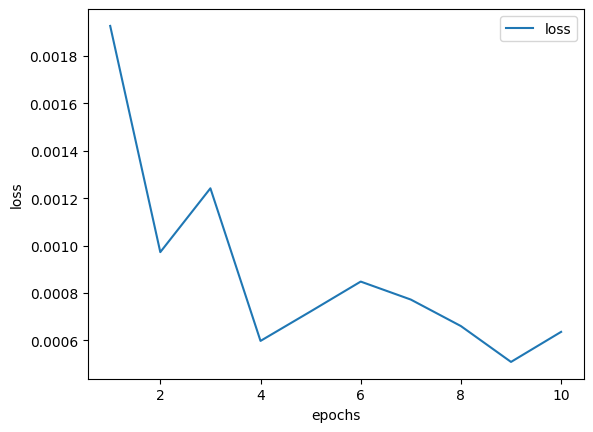

In [253]:
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [215]:
# tf.random.set_seed(42)

# model_2 = Sequential()
# model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) | the simple form is "input_shape(60, 1)
# model_2.add(LSTM(50, return_sequences=False))
# model_2.add(Dense(25))
# model_2.add(Dense(1))

# model_2.compile(optimizer='Adam', loss='mse')


# history_2 = model_2.fit(X_train, y_train, batch_size=1, epochs=6)

In [216]:
# Get the model_2 predicted price values 
# predictions_2 = model_2.predict(X_test)
# predictions_2 = scaler.inverse_transform(predictions_2)
# len(predictions_2)

In [217]:
# Get the root mean squared error (RMSE) for model_2
# rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
# rmse_2

(401, 1)


<ipython-input-254-fa80d596f979>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1


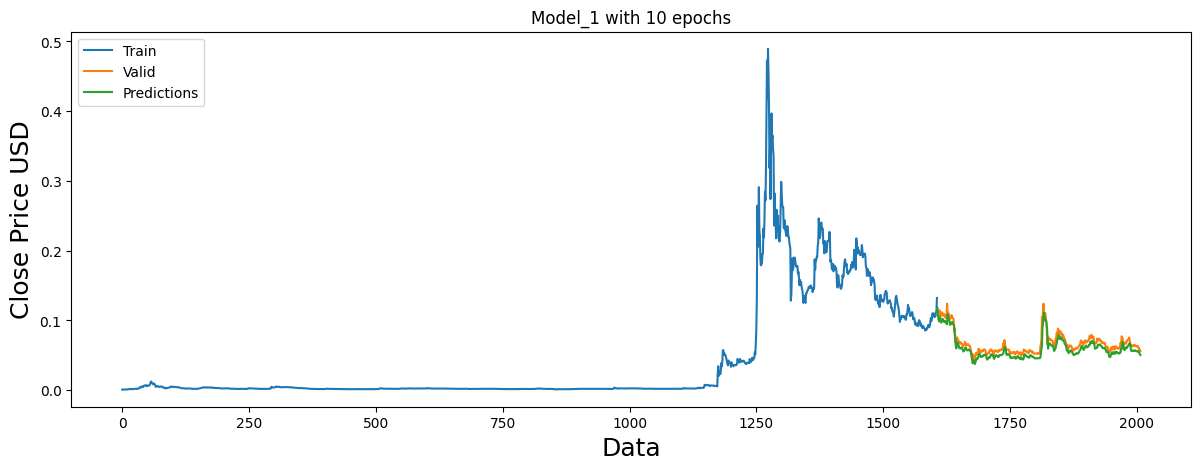

In [254]:
# Plot the data
train = data[:training_data_len]

#data for model_1
valid_1 = data[training_data_len:]
print(valid_1.shape)
valid_1['Predictions'] = predictions_1

# data for model_2
# valid_2 = data[training_data_len:]
# valid_2['Predictions'] = predictions_2

# Visualized the data 
#model_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1 with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

#model_2
# plt.subplot(2, 1, 2)
# plt.title('Model_2 with 6 epochs')
# plt.xlabel('Data', fontsize=18)
# plt.ylabel('Close Price USD', fontsize=18)
# plt.plot(train['Close'])
# plt.plot(valid_2[['Close', 'Predictions']])

# plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [219]:
# last_60_days = data[-60:].values
# last_60_days

In [255]:
#Get the last 60 day closing price values and convert the datadrame to an array
# last_60_days = data[-60:].values

#################################################################################
# !pip install yfinance
import yfinance as yf
tickers = ['DOGE-GBP']
data = yf.download(tickers, period='max')
data.drop("Adj Close", inplace=True, axis=1)
data.drop("Volume", inplace=True, axis=1)
last_60_days = data.tail(60)
last_60_days = last_60_days.drop(last_60_days.index[-1])
last_60_days = last_60_days.drop(last_60_days.index[-1])
last_60_days = last_60_days.filter(['Close'])
# print(last_60_days)
date_str = str(df['Date'].iloc[-1])
# date_str= last_60_days.iloc[-1]

# date_str = date_str.astype(str)
# print(date_str)
# print("-----")
# from datetime import datetime, timedelta
# # date_str = '2023-05-10 00:00:00'
# date = datetime.strptime(date_str, '%Y-%m-%d')

# # Add one day to the date
# new_date = date + timedelta(days=1)

# # Convert the new date to a string
# new_date_str = new_date.strftime('%Y-%m-%d')











# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
# create an empty list
new_X_test = []
# Append the past 60 days
new_X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
new_X_test = np.array(new_X_test)
# Reshape the data 
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model_1.predict(new_X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)
print(f"DOGE price for {date_str} is {pred_price}")

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 1s 772ms/step
DOGE price for 2023-05-11 is [[0.0573843]]


In [119]:
!pip freeze > requirements.txt

In [120]:
!python --version

Python 3.10.11
